In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dabl

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Data wrangling

## Objective  extract schools with no scores but only percentages for modeling

4 observe nulls and remove - found "*  " so need to convert data types after dealing with special characters

In [3]:
dfs = pd.read_csv('../../../data/raw/school_level/sb_ca2021_all_csv_v2/sb_ca2021_all_csv_v2.txt' ,
                  delimiter = "^",low_memory=False)
dfs.drop('Filler',axis=1,inplace=True)
dfs.shape

(3586711, 32)

In [223]:
df[(df['Grade']!=13)&(df['Mean Scale Score'].notnull())]

,County Code,District Code,School Code,Test Year_x,Student Group ID,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,Students Enrolled,...,Type ID_x,Test Year_y,Type ID_y,County Name,District Name,School Name,Zip Code,Demographic ID Num,Demographic Name,Student Group


In [4]:
## check nulls 
m = pd.DataFrame([dfs.isnull().sum(),100*dfs.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(10)


,count,%
Mean Scale Score,2683870.0,74.828164
Percentage Standard Nearly Met,2355727.0,65.679309
Area 1 Percentage Above Standard,2355727.0,65.679309
Area 1 Percentage Near Standard,2355727.0,65.679309
Percentage Standard Met and Above,2355727.0,65.679309
Percentage Standard Met,2355727.0,65.679309
Percentage Standard Exceeded,2355727.0,65.679309
Area 1 Percentage Below Standard,2355727.0,65.679309
Area 2 Percentage Above Standard,2355727.0,65.679309
Area 2 Percentage Near Standard,2355727.0,65.679309


## See over 70 % nulls in lots of columns regarless of df slice

- try coerding target column with to_numeric so see how many nulls arise after to know mac full

In [6]:
## convert features to numbers 

cols = dfs.columns[dfs.dtypes.eq('object')]

# cols
# convert = cols[1:]
# convert

print(dfs['Mean Scale Score'].isnull().sum())
dfs[cols] = dfs[cols].apply(pd.to_numeric,errors='coerce')
print(dfs['Mean Scale Score'].isnull().sum())

2683870
3154643


In [17]:
print(dfs['Mean Scale Score'].isnull().sum())
dfs[convert] = dfs[convert].apply(pd.to_numeric,errors='coerce')
print(dfs['Mean Scale Score'].isnull().sum())

3154643
3154643


In [20]:
dfs.columns

Index(['County Code', 'District Code', 'School Code', 'Test Year',
       'Student Group ID', 'Test Type', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores',
       'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',
       'Type ID'],
      dtype='object')

In [21]:
dfs['School Code'].nunique()

10100

In [47]:
pcts= dfs[(dfs['Mean Scale Score'].isnull())&dfs['Percentage Standard Exceeded'].notnull()].copy()
pcts.shape

(194951, 32)

In [49]:
pcts.head()

,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
365,0,0,0,2021,1,NaN,743626.0,736192.0,13,1,...,21.35,49.56,29.09,13.14,72.35,14.52,22.39,61.37,16.24,4
366,0,0,0,2021,3,NaN,375522.0,371742.0,13,1,...,17.31,48.62,34.07,12.71,71.56,15.73,19.65,61.60,18.75,4
367,0,0,0,2021,4,NaN,367928.0,364279.0,13,1,...,25.48,50.53,23.99,13.58,73.14,13.28,25.18,61.14,13.68,4
368,0,0,0,2021,6,NaN,628259.0,622358.0,13,1,...,24.81,51.85,23.34,14.97,73.43,11.61,25.77,61.70,12.53,4
369,0,0,0,2021,7,NaN,31747.0,31503.0,13,1,...,43.45,44.82,11.73,23.88,70.09,6.02,42.34,52.26,5.40,4


In [26]:
pcts = pcts[(pcts['County Code']!=0)&(pcts['District Code']!=0)&(pcts['School Code']!=0)].copy()
pcts.shape

(153862, 32)

In [27]:
pcts.head()

,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
1999,1,10017,112607,2021,1,NaN,108.0,106.0,13,1,...,10.48,51.43,38.10,12.26,71.70,16.04,19.81,62.26,17.92,9
2000,1,10017,112607,2021,3,NaN,56.0,56.0,13,1,...,8.93,55.36,35.71,16.07,69.64,14.29,21.43,58.93,19.64,9
2001,1,10017,112607,2021,4,NaN,52.0,50.0,13,1,...,12.24,46.94,40.82,8.00,74.00,18.00,18.00,66.00,16.00,9
2002,1,10017,112607,2021,6,NaN,93.0,91.0,13,1,...,12.22,53.33,34.44,13.19,73.63,13.19,21.98,59.34,18.68,9
2004,1,10017,112607,2021,8,NaN,24.0,24.0,13,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


## There are 3.3 K schools from 704 distrcits with percentages but no scores 

In [50]:
pcts['School Code'].nunique()

3305

In [51]:
pcts['District Code'].nunique()

707

## only 30 % of schools are left when removing null mean scale scores

In [52]:
pcts['Test ID'].value_counts()

2    97937
1    97014
Name: Test ID, dtype: int64

## leave as using mean scale score

In [53]:
## check nulls 
m = pd.DataFrame([pcts.isnull().sum(),100*pcts.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(20)

,count,%
Test Type,194951.0,100.000000
Mean Scale Score,194951.0,100.000000
Area 3 Percentage Above Standard,54408.0,27.908551
Area 1 Percentage Near Standard,54408.0,27.908551
Area 4 Percentage Below Standard,54408.0,27.908551
Area 4 Percentage Near Standard,54408.0,27.908551
Area 4 Percentage Above Standard,54408.0,27.908551
Area 3 Percentage Below Standard,54408.0,27.908551
Area 3 Percentage Near Standard,54408.0,27.908551
Area 1 Percentage Above Standard,54408.0,27.908551


In [55]:
pcts.drop(columns=['Test Type','Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',],inplace=True)
pcts.shape

(194951, 19)

### 70 % of all rows even when looking at subsets of the student group are null, need to cut down to clean data 

In [56]:
drop = pcts[pcts['Students Tested']==0]
drop.shape

(0, 19)

In [40]:
pcts.head()

,County Code,District Code,School Code,Test Year,Student Group ID,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,Students Enrolled,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Type ID
1999,1,10017,112607,2021,1,108.0,106.0,13,1,153.0,108.0,NaN,9.43,36.79,46.23,22.64,31.13,106.0,9
2000,1,10017,112607,2021,3,56.0,56.0,13,1,76.0,56.0,NaN,8.93,37.50,46.43,25.00,28.57,56.0,9
2001,1,10017,112607,2021,4,52.0,50.0,13,1,77.0,52.0,NaN,10.00,36.00,46.00,20.00,34.00,50.0,9
2002,1,10017,112607,2021,6,93.0,91.0,13,1,129.0,93.0,NaN,10.99,40.66,51.65,20.88,27.47,91.0,9
2004,1,10017,112607,2021,8,24.0,24.0,13,1,30.0,24.0,NaN,20.83,50.00,70.83,16.67,12.50,24.0,9


In [63]:
dfs.shape

(1232603, 32)

In [41]:
pcts['Student Group ID'].value_counts()

1      6471
29     6468
51     6468
53     6435
6      6376
99     6317
3      6064
180    6008
31     5936
4      5875
78     5693
111    5321
170    5102
204    4973
92     4843
93     4506
91     4493
80     4311
128    4296
8      4287
224    3910
160    3705
142    3668
226    3402
94     3355
90     3212
206    2862
121    2570
144    2270
76     2062
7      1642
227    1455
222    1417
74     1286
202    1072
52      906
200     902
77      826
207     726
223     535
220     453
50      448
28      311
203     217
75      137
79      103
201      82
205      45
221      20
225      16
120       4
Name: Student Group ID, dtype: int64

## Can drop all School where no students were tested and no school code to match on 

In [57]:
pcts.duplicated(subset=['Grade','Test ID','School Code',
                        'District Code','County Code','Student Group ID']).sum()

0

In [58]:
pcts.drop_duplicates(subset=['Grade','Test ID','School Code',
                             'District Code','County Code','Student Group ID'],
                    keep='first',inplace=True)
pcts.shape

(194951, 19)

In [78]:
pcts.duplicated(subset=['Grade','Student Group ID','Test ID','School Code','District Code','County Code']).sum()

0

In [79]:
print(pcts.shape)
pcts = pcts[pcts['School Code'] !=0].copy()
print(pcts.shape)

(194951, 19)
(153862, 19)


## To get unique row identifier need to use 6 columns listed above

In [81]:
entities = pd.read_csv('../../../data/raw/sb_ca2021entities_csv.txt',delimiter='^')
entities.drop('Filler',axis=1,inplace=True)
entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County Code    11149 non-null  int64  
 1   District Code  11149 non-null  int64  
 2   School Code    11149 non-null  int64  
 3   Test Year      11149 non-null  int64  
 4   Type ID        11149 non-null  int64  
 5   County Name    11149 non-null  object 
 6   District Name  11090 non-null  object 
 7   School Name    10099 non-null  object 
 8   Zip Code       10099 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 784.0+ KB


In [82]:
entities['School Code'].nunique()

10100

In [83]:
entities.head()

,County Code,District Code,School Code,Test Year,Type ID,County Name,District Name,School Name,Zip Code
0,0,0,0,2021,4,State of California,NaN,NaN,NaN
1,1,0,0,2021,5,Alameda,NaN,NaN,NaN
2,1,10017,0,2021,6,Alameda,Alameda County Office of Education,NaN,NaN
3,1,10017,112607,2021,9,Alameda,Envision Academy for Arts & Technology,Envision Academy for Arts & Technology,94612.0
4,1,10017,124172,2021,9,Alameda,Yu Ming Charter,Yu Ming Charter,94608.0


## merge data sets

In [84]:
df = pcts.merge(entities,how='left',on=['School Code','District Code','County Code'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153862 entries, 0 to 153861
Data columns (total 25 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   County Code                                  153862 non-null  int64  
 1   District Code                                153862 non-null  int64  
 2   School Code                                  153862 non-null  int64  
 3   Test Year_x                                  153862 non-null  int64  
 4   Student Group ID                             153862 non-null  int64  
 5   Total Tested at Reporting Level              153862 non-null  float64
 6   Total Tested with Scores at Reporting Level  153862 non-null  float64
 7   Grade                                        153862 non-null  int64  
 8   Test ID                                      153862 non-null  int64  
 9   Students Enrolled                            153862 non-nul

In [85]:
df['Test ID'].value_counts()

2    77458
1    76404
Name: Test ID, dtype: int64

In [86]:
df[['County Code', 'District Code','School Code']].nunique()

County Code        58
District Code     704
School Code      3304
dtype: int64

In [87]:
## check nulls 
m = pd.DataFrame([df.isnull().sum(),100*df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(10)


,count,%
Mean Scale Score,153862.0,100.0
County Code,0.0,0.0
Percentage Standard Met,0.0,0.0
School Name,0.0,0.0
District Name,0.0,0.0
County Name,0.0,0.0
Type ID_y,0.0,0.0
Test Year_y,0.0,0.0
Type ID_x,0.0,0.0
Students with Scores,0.0,0.0


## Remove state averages from data set 

In [90]:
df.drop(cali_avgs.index,inplace=True)
df.shape

(153756, 25)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153756 entries, 106 to 153861
Data columns (total 25 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   County Code                                  153756 non-null  int64  
 1   District Code                                153756 non-null  int64  
 2   School Code                                  153756 non-null  int64  
 3   Test Year_x                                  153756 non-null  int64  
 4   Student Group ID                             153756 non-null  int64  
 5   Total Tested at Reporting Level              153756 non-null  float64
 6   Total Tested with Scores at Reporting Level  153756 non-null  float64
 7   Grade                                        153756 non-null  int64  
 8   Test ID                                      153756 non-null  int64  
 9   Students Enrolled                            153756 non-n

## Add student group and test id labels 

In [116]:
groups = pd.read_csv('../../../data/raw/StudentGroups 2.txt',delimiter='^')
groups.rename(columns={'Demographic ID':'Student Group ID'},inplace=True)
groups.tail(8)

,Student Group ID,Demographic ID Num,Demographic Name,Student Group
47,94,94,Graduate school/Post graduate,Parent Education
48,121,121,Declined to state,Parent Education
49,50,50,Armed forces family member,Military Status
50,51,51,Not armed forces family member,Military Status
51,52,52,Homeless,Homeless Status
52,53,53,Not homeless,Homeless Status
53,240,240,Foster youth,Foster Status
54,241,241,Not foster youth,Foster Status


In [93]:
df = df.merge(groups, on='Student Group ID',how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153756 entries, 0 to 153755
Data columns (total 28 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   County Code                                  153756 non-null  int64  
 1   District Code                                153756 non-null  int64  
 2   School Code                                  153756 non-null  int64  
 3   Test Year_x                                  153756 non-null  int64  
 4   Student Group ID                             153756 non-null  int64  
 5   Total Tested at Reporting Level              153756 non-null  float64
 6   Total Tested with Scores at Reporting Level  153756 non-null  float64
 7   Grade                                        153756 non-null  int64  
 8   Test ID                                      153756 non-null  int64  
 9   Students Enrolled                            153756 non-nul

In [98]:
df.columns

Index(['County Code', 'District Code', 'School Code', 'Test Year_x',
       'Student Group ID', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'Type ID_x',
       'Test Year_y', 'Type ID_y', 'County Name', 'District Name',
       'School Name', 'Zip Code', 'Demographic ID Num', 'Demographic Name',
       'Student Group'],
      dtype='object')

In [94]:
# convert test types to name 
df['Test ID'] = df['Test ID'].map({1:'English Language Arts/Literacy',2:'Mathematics'})
df['Test ID'].unique()

array(['Mathematics', 'English Language Arts/Literacy'], dtype=object)

In [100]:
df[df['School Code']==3030608]['Grade'].value_counts()

13    38
Name: Grade, dtype: int64

In [103]:
df['Grade'].value_counts()

13    153756
Name: Grade, dtype: int64

In [112]:
df[(df['School Name'].str.startswith('Abraham Lincoln High School'))][['School Code',
                                'School Name','Zip Code','Students Tested','Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'Type ID_x',
]]

,School Code,School Name,Zip Code,Students Tested,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Type ID_x


In [136]:
df[(df['School Name'].str.contains(' High School'))]['School Name'].value_counts()

Grand Terrace High School at the Ray Abril Jr. Edu    61
University High School Charter                        54
Encore Jr./Sr. High School for the Performing and     50
McFarland High School Early College                   48
Renaissance High School for the Arts                  38
Los Angeles High School of the Arts                   32
Visual and Performing Arts at Legacy High School C    30
L.A. County High School for the Arts                  30
Name: School Name, dtype: int64

In [ ]:
## the lost scores of McFarland High School ?


In [148]:
df['Test ID'].value_counts()

Mathematics                       77405
English Language Arts/Literacy    76351
Name: Test ID, dtype: int64

In [158]:
df[(df['School Name']=='McFarland High School Early College')&(df['Student Group']=='Parent Education')][['School Code',
                                'School Name','Zip Code','Demographic Name','Students Tested','Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'Type ID_x',
]]

,School Code,School Name,Zip Code,Demographic Name,Students Tested,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Type ID_x
25975,1534155,McFarland High School Early College,93250.0,Not a high school graduate,117.0,12.82,21.37,34.19,17.09,48.72,117.0,7
25976,1534155,McFarland High School Early College,93250.0,High school graduate,60.0,10.00,28.33,38.33,25.00,36.67,60.0,7
25977,1534155,McFarland High School Early College,93250.0,Some college (includes AA degree),28.0,14.29,28.57,42.86,21.43,35.71,28.0,7
25978,1534155,McFarland High School Early College,93250.0,College graduate,15.0,20.00,33.33,53.33,20.00,26.67,15.0,7
25999,1534155,McFarland High School Early College,93250.0,Not a high school graduate,116.0,5.17,8.62,13.79,27.59,58.62,116.0,7
26000,1534155,McFarland High School Early College,93250.0,High school graduate,60.0,0.00,16.67,16.67,18.33,65.00,60.0,7
26001,1534155,McFarland High School Early College,93250.0,Some college (includes AA degree),28.0,3.57,10.71,14.29,35.71,50.00,28.0,7
26002,1534155,McFarland High School Early College,93250.0,College graduate,15.0,20.00,6.67,26.67,26.67,46.67,15.0,7


In [167]:
# mc[mc['Test ID'].str.contains('Mathematics')]
mc['Test ID']

25975    English Language Arts/Literacy
25976    English Language Arts/Literacy
25977    English Language Arts/Literacy
25978    English Language Arts/Literacy
25999                       Mathematics
26000                       Mathematics
26001                       Mathematics
26002                       Mathematics
Name: Test ID, dtype: object

In [163]:
mc.columns

Index(['School Code', 'School Name', 'Zip Code', 'Demographic Name',
       'Students Tested', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Type ID_x'],
      dtype='object')

In [190]:
mc = df[(df['School Name']=='McFarland High School Early College')&(df['Student Group']=='Parent Education')][['School Code',
                                'School Name','Zip Code','Demographic Name','Students Tested','Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'Test ID',
]].copy()
mc.head()

,School Code,School Name,Zip Code,Demographic Name,Students Tested,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Test ID
25975,1534155,McFarland High School Early College,93250.0,Not a high school graduate,117.0,12.82,21.37,34.19,17.09,48.72,117.0,English Language Arts/Literacy
25976,1534155,McFarland High School Early College,93250.0,High school graduate,60.0,10.00,28.33,38.33,25.00,36.67,60.0,English Language Arts/Literacy
25977,1534155,McFarland High School Early College,93250.0,Some college (includes AA degree),28.0,14.29,28.57,42.86,21.43,35.71,28.0,English Language Arts/Literacy
25978,1534155,McFarland High School Early College,93250.0,College graduate,15.0,20.00,33.33,53.33,20.00,26.67,15.0,English Language Arts/Literacy
25999,1534155,McFarland High School Early College,93250.0,Not a high school graduate,116.0,5.17,8.62,13.79,27.59,58.62,116.0,Mathematics


In [210]:
ela = mc[mc['Test ID']=='English Language Arts/Literacy'].copy()
ela['Students Tested'] = ela['Students Tested'].astype('int')
ela

,School Code,School Name,Zip Code,Demographic Name,Students Tested,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Test ID
25975,1534155,McFarland High School Early College,93250.0,Not a high school graduate,117,12.82,21.37,34.19,17.09,48.72,117.0,English Language Arts/Literacy
25976,1534155,McFarland High School Early College,93250.0,High school graduate,60,10.00,28.33,38.33,25.00,36.67,60.0,English Language Arts/Literacy
25977,1534155,McFarland High School Early College,93250.0,Some college (includes AA degree),28,14.29,28.57,42.86,21.43,35.71,28.0,English Language Arts/Literacy
25978,1534155,McFarland High School Early College,93250.0,College graduate,15,20.00,33.33,53.33,20.00,26.67,15.0,English Language Arts/Literacy


In [217]:
tidy = ela[['Demographic Name','Students Tested',
       'Percentage Standard Met and Above','Percentage Standard Not Met']].melt(id_vars='Demographic Name').rename(columns=str.title)
tidy

,Demographic Name,Variable,Value
0,Not a high school graduate,Students Tested,117.00
1,High school graduate,Students Tested,60.00
2,Some college (includes AA degree),Students Tested,28.00
3,College graduate,Students Tested,15.00
4,Not a high school graduate,Percentage Standard Met and Above,34.19
5,High school graduate,Percentage Standard Met and Above,38.33
6,Some college (includes AA degree),Percentage Standard Met and Above,42.86
7,College graduate,Percentage Standard Met and Above,53.33
8,Not a high school graduate,Percentage Standard Not Met,48.72
9,High school graduate,Percentage Standard Not Met,36.67


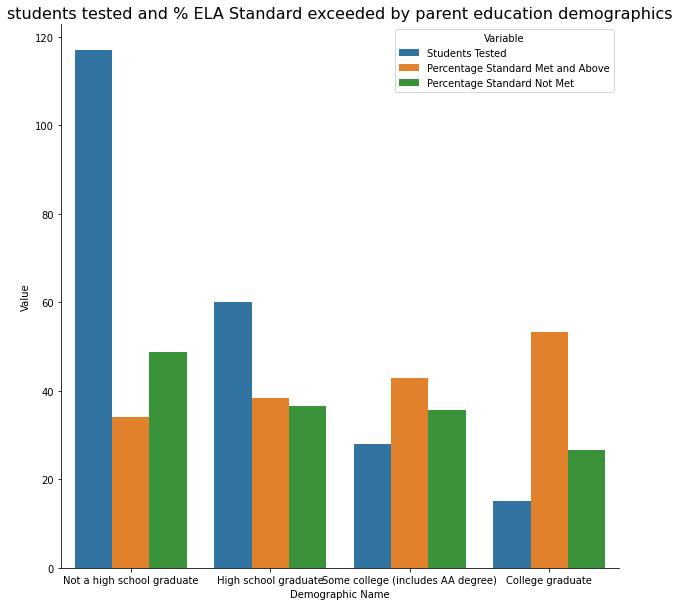

In [219]:
fig, ax1 = plt.subplots(figsize=(10,10))
sns.barplot(x='Demographic Name',y='Value',hue='Variable',data=tidy,ax=ax1)
plt.title('students tested and % ELA Standard exceeded by parent education demographics',size=16)
sns.despine(fig)
plt.show()

In [ ]:
math = mc[mc['Test ID']=='Mathematics'].copy()
math['Students Tested'] = math['Students Tested'].astype('int')
math

In [215]:
tidy = math[['Demographic Name','Students Tested',
       'Percentage Standard Met and Above','Percentage Standard Not Met']].melt(id_vars='Demographic Name').rename(columns=str.title)
tidy

,Demographic Name,Variable,Value
0,Not a high school graduate,Students Tested,116.00
1,High school graduate,Students Tested,60.00
2,Some college (includes AA degree),Students Tested,28.00
3,College graduate,Students Tested,15.00
4,Not a high school graduate,Percentage Standard Met and Above,13.79
5,High school graduate,Percentage Standard Met and Above,16.67
6,Some college (includes AA degree),Percentage Standard Met and Above,14.29
7,College graduate,Percentage Standard Met and Above,26.67
8,Not a high school graduate,Percentage Standard Not Met,58.62
9,High school graduate,Percentage Standard Not Met,65.00


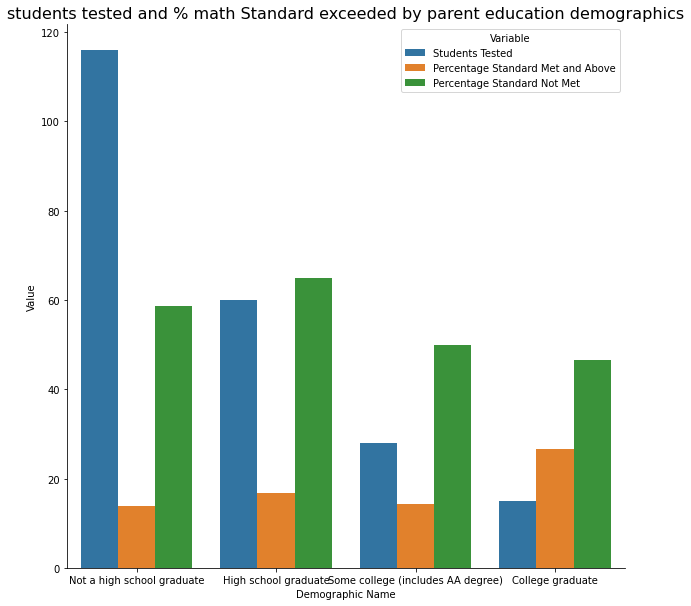

In [216]:
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10,10))
sns.barplot(x='Demographic Name',y='Value',hue='Variable',data=tidy,ax=ax1)
plt.title('students tested and % math Standard exceeded by parent education demographics',size=16)
sns.despine(fig)
plt.show()

,Demographic Name,Variable,Value
0,Not a high school graduate,School Code,1534155
1,High school graduate,School Code,1534155
2,Some college (includes AA degree),School Code,1534155
3,College graduate,School Code,1534155
4,Not a high school graduate,School Name,McFarland High School Early College
5,High school graduate,School Name,McFarland High School Early College
6,Some college (includes AA degree),School Name,McFarland High School Early College
7,College graduate,School Name,McFarland High School Early College
8,Not a high school graduate,Zip Code,93250.0
9,High school graduate,Zip Code,93250.0


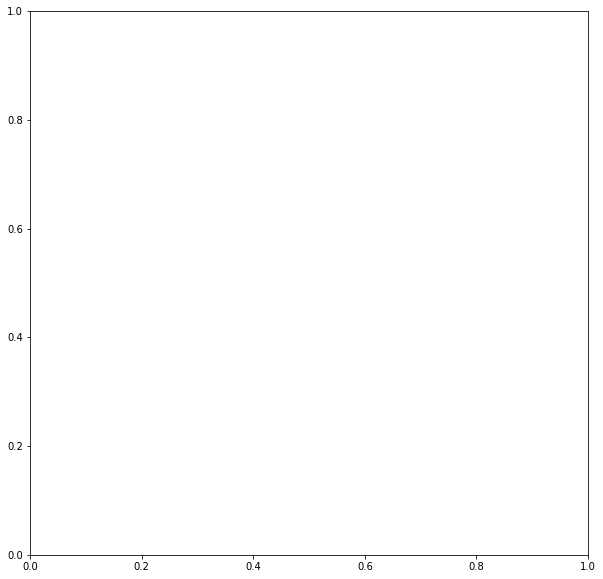

In [192]:
fig, ax = plt.subplots(figsize=(10,10))
tidy = math.melt(id_vars='Demographic Name').rename(columns=str.title)
tidy

In [142]:
df[(df['School Name']=='McFarland High School Early College')&(df['Student Group']=='Parental Education')]['Demographic Name'].value_counts()

Series([], Name: Demographic Name, dtype: int64)

In [144]:
df[(df['School Name'].str.contains(' High School'))][['School Code',
                                'School Name','Zip Code','Students Tested','Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'Type ID_x',
]].tail(4)

,School Code,School Name,Zip Code,Students Tested,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Type ID_x
91567,116707,Encore Jr./Sr. High School for the Performing and,92345.0,17.0,5.88,5.88,11.76,23.53,64.71,17.0,9
91568,116707,Encore Jr./Sr. High School for the Performing and,92345.0,16.0,0.00,0.00,0.00,13.33,86.67,15.0,9
91569,116707,Encore Jr./Sr. High School for the Performing and,92345.0,53.0,0.00,3.77,3.77,20.75,75.47,53.0,9
91570,116707,Encore Jr./Sr. High School for the Performing and,92345.0,18.0,0.00,16.67,16.67,22.22,61.11,18.0,9


In [119]:
df[df['Grade']==13]['Student Group'].value_counts()

English-Language Fluency                        30770
Parent Education                                22963
Race and Ethnicity                              16674
Gender                                          11931
Economic Status                                 11249
Ethnicity for Not Economically Disadvantaged    11201
Ethnicity for Economically Disadvantaged        10871
Disability Status                               10606
Homeless Status                                  7337
Military Status                                  6912
Migrant                                          6775
All Students                                     6467
Name: Student Group, dtype: int64

In [126]:
df[df['Student Group']=='Parental Education']

,County Code,District Code,School Code,Test Year_x,Student Group ID,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,Students Enrolled,...,Type ID_x,Test Year_y,Type ID_y,County Name,District Name,School Name,Zip Code,Demographic ID Num,Demographic Name,Student Group


In [125]:
df[df['Student Group']=='Parental Education']['Demographic Name'].value_counts()

Series([], Name: Demographic Name, dtype: int64)

In [127]:
df[(df['Grade']==13)&(df['Student Group']=='Parent Education')]['Demographic Name'].value_counts()

Some college (includes AA degree)    4839
College graduate                     4502
High school graduate                 4491
Graduate school/Post graduate        3353
Not a high school graduate           3210
Declined to state                    2568
Name: Demographic Name, dtype: int64

In [117]:
df[df['Grade']==13]['Demographic Name'].value_counts()

Hispanic or Latino                                                  14572
White                                                               10571
All Students                                                         6467
Not armed forces family member                                       6464
Not migrant education                                                6464
Not homeless                                                         6431
IFEP and EO (Initial fluent English proficient and English only)     6372
No reported disabilities                                             6313
Male                                                                 6060
EO (English only)                                                    6004
Economically disadvantaged                                           5932
Female                                                               5871
Not economically disadvantaged                                       5317
Ever�EL                               

In [102]:
df[df['Grade']==13][['School Code',
                                'School Name','Zip Code','Students Tested','Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'Type ID_x',
]]

,School Code,School Name,Zip Code,Students Tested,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Type ID_x
0,124172,Yu Ming Charter,94608.0,87.0,77.01,14.94,91.95,8.05,0.00,87.0,9
1,131581,Oakland Unity Middle,94621.0,136.0,2.96,12.59,15.56,23.70,60.74,135.0,9
2,131581,Oakland Unity Middle,94621.0,66.0,3.03,12.12,15.15,15.15,69.70,66.0,9
3,131581,Oakland Unity Middle,94621.0,70.0,2.90,13.04,15.94,31.88,52.17,69.0,9
4,131581,Oakland Unity Middle,94621.0,79.0,5.13,19.23,24.36,26.92,48.72,78.0,9
...,...,...,...,...,...,...,...,...,...,...,...
153751,6118806,Wheatland Charter Academy,95903.0,11.0,18.18,18.18,36.36,54.55,9.09,11.0,10
153752,6118806,Wheatland Charter Academy,95903.0,26.0,19.23,42.31,61.54,30.77,7.69,26.0,10
153753,6118806,Wheatland Charter Academy,95903.0,21.0,19.05,28.57,47.62,38.10,14.29,21.0,10
153754,6118806,Wheatland Charter Academy,95903.0,29.0,13.79,37.93,51.72,34.48,13.79,29.0,10


In [99]:
df[df['District Name'].str.startswith('San Fran')][['School Code',
                                'School Name','Zip Code','Students Tested','Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'Type ID_x',
]]

,School Code,School Name,Zip Code,Students Tested,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Type ID_x
100901,6040695,Alamo Elementary,94121.0,18.0,61.11,16.67,77.78,5.56,16.67,18.0,7
100902,6040695,Alamo Elementary,94121.0,17.0,58.82,17.65,76.47,5.88,17.65,17.0,7
100903,6040695,Alamo Elementary,94121.0,18.0,61.11,16.67,77.78,5.56,16.67,18.0,7
100904,6040695,Alamo Elementary,94121.0,18.0,61.11,16.67,77.78,5.56,16.67,18.0,7
100905,6040695,Alamo Elementary,94121.0,18.0,61.11,16.67,77.78,5.56,16.67,18.0,7
100906,6040695,Alamo Elementary,94121.0,16.0,62.50,18.75,81.25,6.25,12.50,16.0,7
100907,6040695,Alamo Elementary,94121.0,14.0,57.14,14.29,71.43,7.14,21.43,14.0,7
100908,6040695,Alamo Elementary,94121.0,17.0,56.25,25.00,81.25,6.25,12.50,16.0,7
100909,6040695,Alamo Elementary,94121.0,16.0,53.33,26.67,80.00,6.67,13.33,15.0,7
100910,6040695,Alamo Elementary,94121.0,17.0,56.25,25.00,81.25,6.25,12.50,16.0,7


In [96]:
df.sample(4).T

,79250,124425,138250,22903
County Code,31,41,43,13
District Code,66795,69013,73387,63198
School Code,6031066,6044010,4334470,6008619
Test Year_x,2021,2021,2021,2021
Student Group ID,180,111,223,51
Total Tested at Reporting Level,239.0,109.0,57.0,259.0
Total Tested with Scores at Reporting Level,239.0,109.0,57.0,253.0
Grade,5,5,11,7
Test ID,English Language Arts/Literacy,Mathematics,Mathematics,Mathematics
Students Enrolled,37.0,43.0,88.0,56.0


In [90]:
df.columns

Index(['County Code', 'District Code', 'School Code', 'Test Year_x',
       'Student Group ID', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores',
       'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',
       'Type ID_x', 'Test Year_y', 'Type ID_y', 'Cou

In [73]:
df[df['Demographic Name']=='Female']['School Code'].nunique()

2796

In [74]:
df[df['Demographic Name']=='Male']['School Code'].nunique()

2867

In [75]:
df[df['Demographic Name']=='Filipino']['School Code'].nunique()

252

<AxesSubplot:>

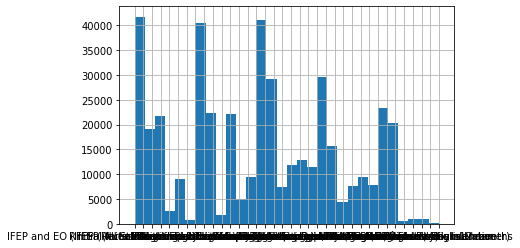

In [77]:
df['Demographic Name'].hist(bins=30)

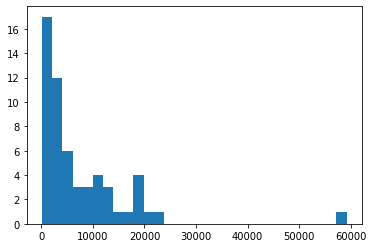

In [76]:
dist_nums = df['County Name'].value_counts()
plt.hist(dist_nums,bins=30)
plt.show()

In [103]:
## per county reporting school count

In [104]:
df['County Name'].value_counts().head(5)

Los Angeles    31445
San Diego       9585
Santa Clara     9549
San Joaquin     9300
Sacramento      7780
Name: County Name, dtype: int64

Target looks like regression
Showing only top 10 of 22 continuous features


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 22 outliers in column Percentage Standard Met.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 9 outliers in column Area 3 Percentage Below Standard.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/robertrustia/opt/anaconda3

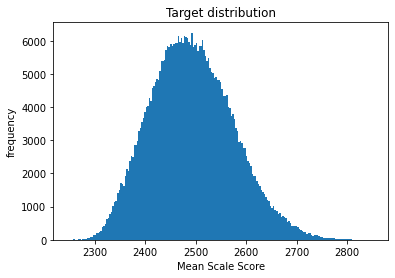

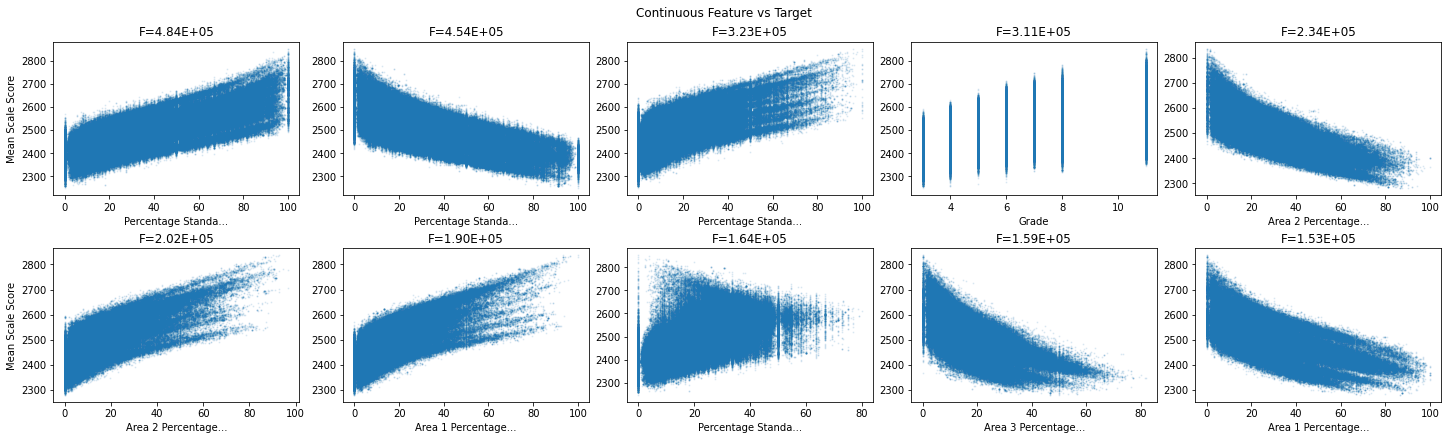

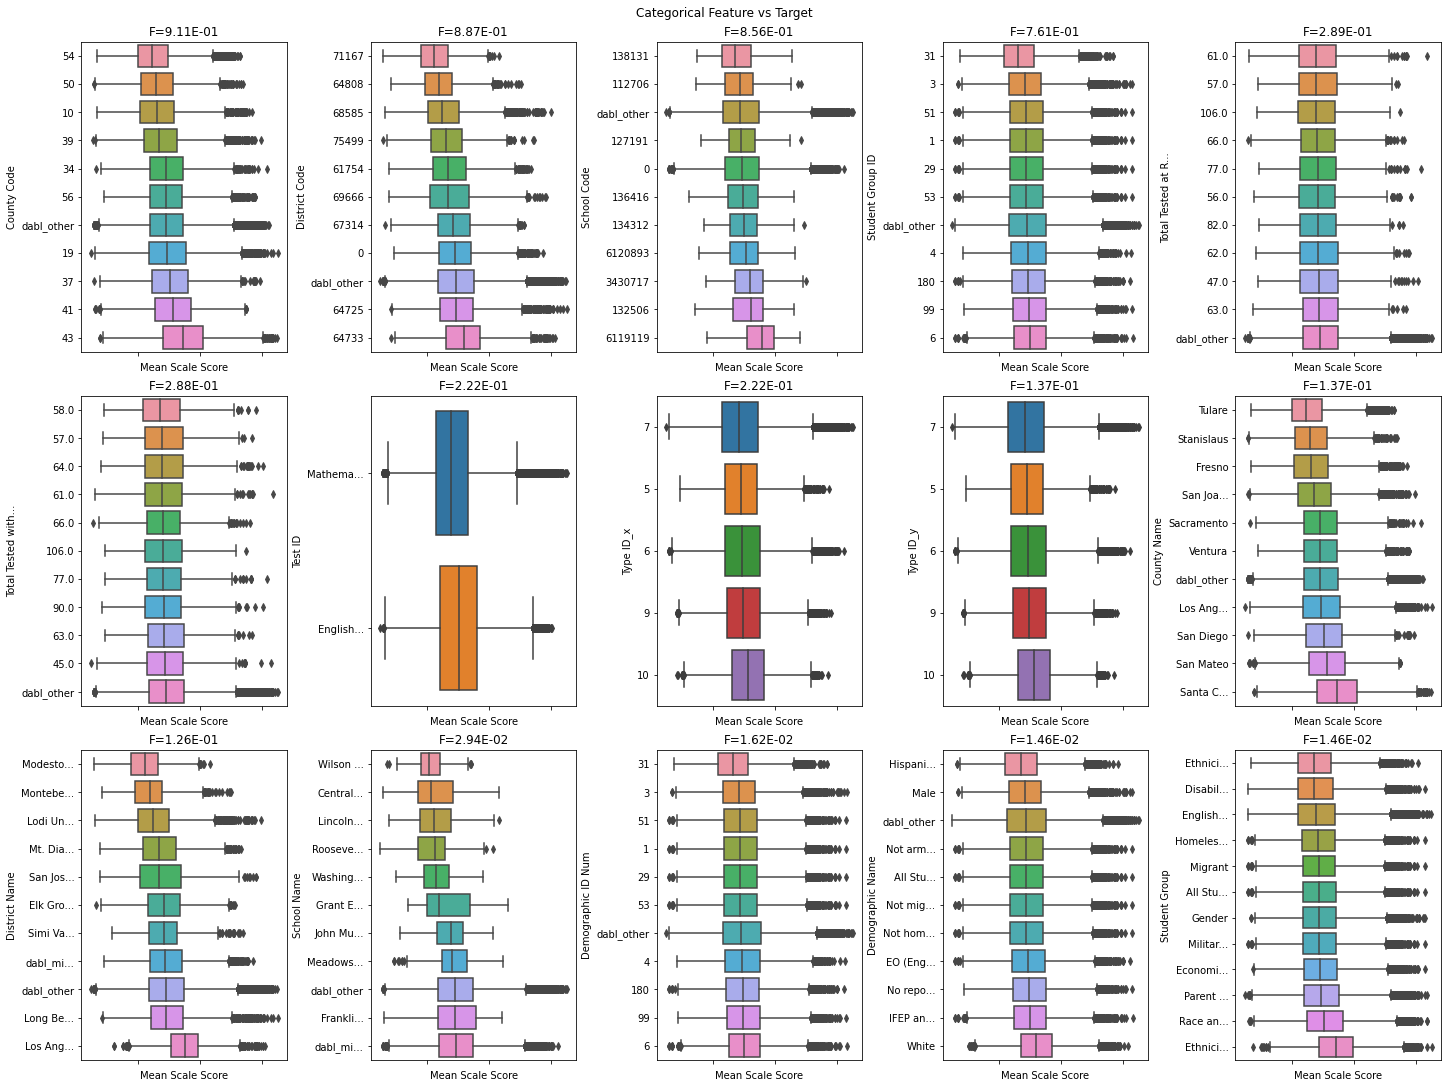

In [82]:
dabl.plot(df, target_col = 'Mean Scale Score')
plt.show()

In [105]:
df['School Code'].nunique()

2600

In [78]:
df['Percentage Standard Exceeded'].nunique() 

7283

## data over 400k right now, decent for later, not all at % but all have mean score

In [79]:
df.to_csv('../../../data/by_student_group/2021-SB_math_ela_scores.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431341 entries, 0 to 431340
Data columns (total 40 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   County Code                                  431341 non-null  int64  
 1   District Code                                431341 non-null  int64  
 2   School Code                                  431341 non-null  int64  
 3   Test Year_x                                  431341 non-null  int64  
 4   Student Group ID                             431341 non-null  int64  
 5   Total Tested at Reporting Level              431341 non-null  float64
 6   Total Tested with Scores at Reporting Level  431341 non-null  float64
 7   Grade                                        431341 non-null  int64  
 8   Test ID                                      431341 non-null  object 
 9   Students Enrolled                            431341 non-nul

In [83]:
score_means = df.groupby('County Name')[['Percentage Standard Met','Percentage Standard Exceeded','Percentage Standard Not Met']].mean()
score_means['difference'] = score_means['Percentage Standard Exceeded']-score_means['Percentage Standard Not Met']
score_means.sort_values(by='Percentage Standard Exceeded',ascending=False).head(7)

,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Not Met,difference
County Name,,,,
Santa Clara,22.513650,36.379555,23.301919,13.077635
Santa Cruz,28.344314,30.812468,18.893656,11.918812
San Mateo,24.110998,29.406809,25.883117,3.523692
Napa,27.666601,28.914706,19.375556,9.539150
Alameda,24.681694,27.032306,26.978996,0.053310
Marin,24.658342,23.790939,28.730503,-4.939564
Trinity,29.301570,23.443236,22.480129,0.963107


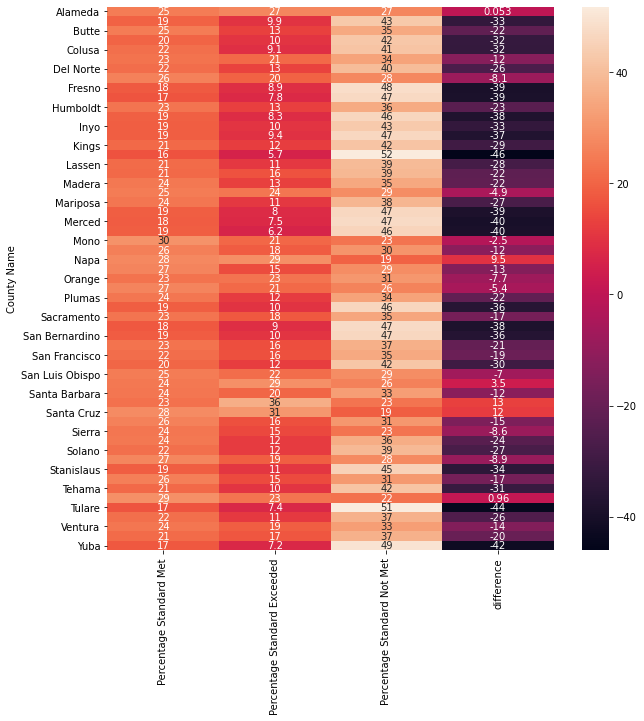

In [84]:
import seaborn as sns
ax,plot = plt.subplots(figsize=(10,10))
ax = sns.heatmap(score_means,annot=True)

In [85]:
district_means = df.groupby(['District Name','Test ID'])[['Percentage Standard Met','Percentage Standard Exceeded','Percentage Standard Not Met']].mean()
district_means['difference'] = district_means['Percentage Standard Exceeded']-district_means['Percentage Standard Not Met']
district_means.sort_values(by='Percentage Standard Exceeded',ascending=False).head(15)

Percentage Standard Met  \
District Name             Test ID                                                   
University High           English Language Arts/Literacy                21.355652   
Bullis Charter            Mathematics                                   17.030080   
Yu Ming Charter           Mathematics                                   16.635213   
Union Street Charter      English Language Arts/Literacy                16.697500   
Cold Spring Elementary    Mathematics                                   23.559808   
Fremont Union High        Mathematics                                   14.666774   
                          English Language Arts/Literacy                19.531475   
San Ramon Valley Unified  English Language Arts/Literacy                22.739245   
ABC Unified               English Language Arts/Literacy                23.759653   
Albany City Unified       English Language Arts/Literacy                22.378519   
Berkeley Unified          English Language Arts/Literacy                27.980588   
Lompoc Unified            English Language Arts/Literacy                19.550000   
Saratoga Union Elementary Mathematics                                   19.461919   
Las Lomitas Elementary    Mathematics                                   18.807348   
Cold Spring Elementary    English Language Arts/Literacy                32.516538   

                                                          Percentage Standard Exceeded  \
District Name             Test ID                                                        
University High           English Language Arts/Literacy                     77.872609   
Bullis Charter            Mathematics                                        74.764480   
Yu Ming Charter           Mathematics                                        74.244574   
Union Street Charter      English Language Arts/Literacy                     73.473929   
Cold Spring Elementary    Mathematics                                        71.910192   
Fremont Union High        Mathematics                                        71.888710   
                          English Language Arts/Literacy                     71.296066   
San Ramon Valley Unified  English Language Arts/Literacy                     70.811887   
ABC Unified               English Language Arts/Literacy                     70.488069   
Albany City Unified       English Language Arts/Literacy                     68.059630   
Berkeley Unified          English Language Arts/Literacy                     67.765294   
Lompoc Unified            English Language Arts/Literacy                     67.595714   
Saratoga Union Elementary Mathematics                                        67.109593   
Las Lomitas Elementary    Mathematics                                        66.576435   
Cold Spring Elementary    English Language Arts/Literacy                     65.427500   

                                                          Percentage Standard Not Met  \
District Name             Test ID                                                       
University High           English Language Arts/Literacy                     0.772174   
Bullis Charter            Mathematics                                        1.826800   
Yu Ming Charter           Mathematics                                        1.369787   
Union Street Charter      English Language Arts/Literacy                     2.214643   
Cold Spring Elementary    Mathematics                                        0.000000   
Fremont Union High        Mathematics                                        6.072661   
                          English Language Arts/Literacy                     1.881803   
San Ramon Valley Unified  English Language Arts/Literacy                     0.000000   
ABC Unified               English Language Arts/Literacy                     1.985212   
Albany City Unified       English Language Arts/Literacy                     2.436296   
Berkeley Unif

In [86]:
score_means.sample(5)

,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Not Met,difference
County Name,,,,
Marin,24.658342,23.790939,28.730503,-4.939564
Tuolumne,22.216241,11.370565,36.950208,-25.579642
Sonoma,26.946697,18.795390,27.714096,-8.918705
Madera,23.900283,12.994466,34.697878,-21.703412
Kings,20.962666,12.269852,41.654592,-29.384740


In [87]:
district_means.sort_values(by='Percentage Standard Exceeded').head(15)

Percentage Standard Met  \
District Name                            Test ID                                                   
Los Banos Unified                        Mathematics                                    2.835759   
IvyTech Charter                          Mathematics                                   15.401429   
Kern County Office of Education          Mathematics                                    0.000000   
Kid Street Learning Center Charter       Mathematics                                   11.902857   
Linden Unified                           English Language Arts/Literacy                15.981111   
                                         Mathematics                                    0.000000   
Loleta Union Elementary                  English Language Arts/Literacy                 4.870714   
                                         Mathematics                                    0.000000   
Los Angeles Academy of Arts and Enterpri Mathematics                                    0.000000   
one.Charter                              English Language Arts/Literacy                20.430000   
Ipakanni Early College Charter           Mathematics                                    8.330000   
Madera County Superintendent of Schools  Mathematics                                    0.000000   
Marconi Learning Academy                 Mathematics                                    2.114500   
Marin County Office of Education         English Language Arts/Literacy                27.270000   
Merced County Office of Education        Mathematics                                    4.707321   

                                                                         Percentage Standard Exceeded  \
District Name                            Test ID                                                        
Los Banos Unified                        Mathematics                                              0.0   
IvyTech Charter                          Mathematics                                              0.0   
Kern County Office of Education          Mathematics                                              0.0   
Kid Street Learning Center Charter       Mathematics                                              0.0   
Linden Unified                           English Language Arts/Literacy                           0.0   
                                         Mathematics                                              0.0   
Loleta Union Elementary                  English Language Arts/Literacy                           0.0   
                                         Mathematics                                              0.0   
Los Angeles Academy of Arts and Enterpri Mathematics                                              0.0   
one.Charter                              English Language Arts/Literacy                           0.0   
Ipakanni Early College Charter           Mathematics                                              0.0   
Madera County Superintendent of Schools  Mathematics                                              0.0   
Marconi Learning Academy                 Mathematics                                              0.0   
Marin County Office of Education         English Language Arts/Literacy                           0.0   
Merced County Office of Education        Mathematics                                              0.0   

                                                                         Percentage Standard Not Met  \
District Name                            Test ID                                                       
Los Banos Unified                        Mathematics                                       81.254494   
IvyTech Charter                          Mathematics                                       78.200000   
Kern County Office of Education          Mathematics                                       91.989469   
Kid Street Learning Center Charter       Mathematics              